# Linear Regression

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set up data
X_train = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
y_train = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X_train.shape[0]

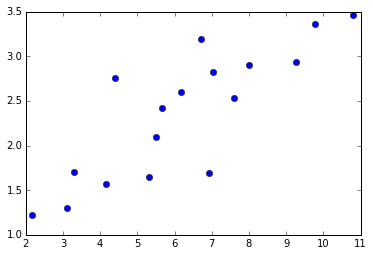

In [5]:
plt.plot(X_train, y_train, 'o')
plt.show()

In [30]:
# Tensorflow Stuff
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [31]:
# set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [32]:
# create model
activation = tf.add(tf.mul(X, W), b)

In [33]:
# cost function / minimize squared errors
cost = tf.reduce_sum(tf.pow(activation - Y, 2))/(2*n_samples)

In [34]:
# create train model with Gradient Descent
learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [35]:
# init all variables
init = tf.initialize_all_variables()

Epoch: 0001 cost= 3.412170649 W= 0.503328 b= 1.74561
Epoch: 0051 cost= 0.120609127 W= 0.133192 b= 1.63885
Epoch: 0101 cost= 0.115584515 W= 0.140116 b= 1.58904
Epoch: 0151 cost= 0.111139536 W= 0.146627 b= 1.5422
Epoch: 0201 cost= 0.107207060 W= 0.15275 b= 1.49815
Epoch: 0251 cost= 0.103727996 W= 0.15851 b= 1.45672
Epoch: 0301 cost= 0.100649826 W= 0.163927 b= 1.41775
Epoch: 0351 cost= 0.097926408 W= 0.169022 b= 1.38109
Epoch: 0401 cost= 0.095516786 W= 0.173814 b= 1.34662
Epoch: 0451 cost= 0.093384989 W= 0.178321 b= 1.3142
Epoch: 0501 cost= 0.091498785 W= 0.18256 b= 1.2837
Epoch: 0551 cost= 0.089829870 W= 0.186547 b= 1.25502
Epoch: 0601 cost= 0.088353232 W= 0.190297 b= 1.22804
Epoch: 0651 cost= 0.087046854 W= 0.193824 b= 1.20267
Epoch: 0701 cost= 0.085891023 W= 0.19714 b= 1.17881
Epoch: 0751 cost= 0.084868252 W= 0.20026 b= 1.15637
Epoch: 0801 cost= 0.083963245 W= 0.203194 b= 1.13526
Epoch: 0851 cost= 0.083162449 W= 0.205953 b= 1.11541
Epoch: 0901 cost= 0.082453817 W= 0.208549 b= 1.09674
E

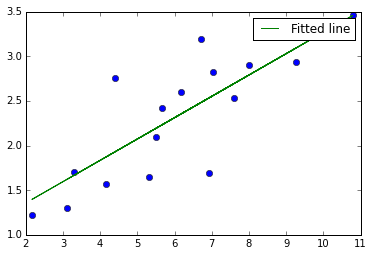

In [41]:
# launch
training_epochs = 2000

with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(X_train, y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % 50 == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: X_train, Y: y_train})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: X_train, Y: y_train}), \
          "W=", sess.run(W), "b=", sess.run(b)
    
    plt.plot(X_train, y_train, 'o')
    plt.plot(X_train, sess.run(W) * X_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()